#  Найти на черно-белом изображении наибольший по площади контур, который не является контуром всего изображения. Затем нужно выделить найденный контур на изображении и и вырезает изображение внутри этого контура.

### 1) Импортируем необходимые библиотеки

In [1]:
import cv2
import matplotlib.pyplot as plt

### 2)Загрузим изображение и преобразуем в оттенки серого

In [2]:
image = cv2.imread("circ.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### 3)Применяем бинаризацию для выделения черных кругов. Пороговое значение равно 10.

In [3]:
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

### 4)Найти все контуры на изображении

Находим контуры на изображении с помощью функции findContours. Здесь используется метод RETR_TREE для извлечения всех контуров и иерархии и метод CHAIN_APPROX_SIMPLE для упрощения полученных контуров.

In [4]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

### 5)Находим контур с наибольшей площадью в списке контуров с помощью цикла for. Здесь используется функция contourArea, чтобы определить площадь контура.

In [5]:
max_area = 0
max_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    x, y, w, h = cv2.boundingRect(contour)
    if area > max_area and not (x == 0 and y == 0 and w == image.shape[1] and h == image.shape[0]):
        max_area = area
        max_contour = contour


### 6) Нарисовать контур на изображении.

In [6]:
if max_contour is not None:
    cv2.drawContours(image, [max_contour], -1, (0, 255, 0), 3)
    
    # 7)Найти ограничивающий прямоугольник для контура и вырезать этот участок
    x, y, w, h = cv2.boundingRect(max_contour)
    cropped_image = image[y:y+h, x:x+w]

### 8)Создать фигуру и задать размер и отобразить изображение с контуром и вырезанную область

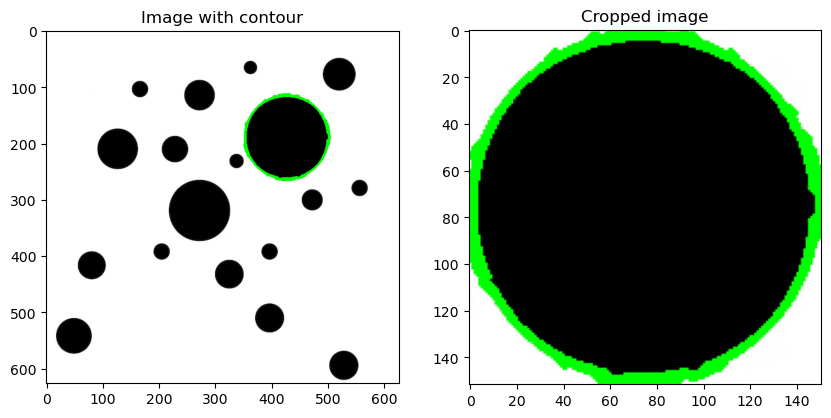

In [7]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title("Image with contour")

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
ax2.set_title("Cropped image")

plt.show()
